In [1]:
# Lets import the library and data set

import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")


In [2]:
# Importing the data set

df = pd.read_csv(r'C:\Users\Pratik\Downloads\EUStockMarket.csv')


df.head()

,DAX,SMI,CAC,FTSE
0,1628.75,1678.1,1772.8,2443.6
1,1613.63,1688.5,1750.5,2460.2
2,1606.51,1678.6,1718.0,2448.2
3,1621.04,1684.1,1708.1,2470.4
4,1618.16,1686.6,1723.1,2484.7


In [3]:
# Select the stock price of CAC

df_cac = df[['CAC']]

df_cac

,CAC
0,1772.8
1,1750.5
2,1718.0
3,1708.1
4,1723.1
...,...
1855,3939.5
1856,3846.0
1857,3945.7
1858,3951.7


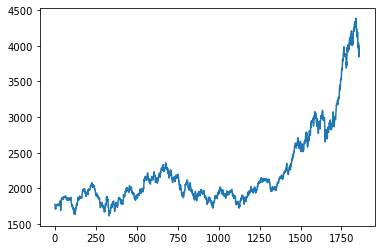

In [4]:
# Method a - By simply plotting

from matplotlib import pyplot as plt

plt.plot(df_cac)

Here we can see that the data does not have a constant average and the average value increase every day which also indicate that the data have upward trend in it.

## Using ADF Test:

using ADF Test We can check the stationarity of Data 

Using dikey-fuller test - In this test of hypothesis, the null hypothesis is that the time series is not stationary and alternative hypothesis is that the time series is stationary. The test is perform by default under 0.05 significance level.

From the test we check the p-value and if: a) p-value of test > 0.05 - Accept the null hypothesis b) p-value of test < 0.05 - Reject the null hypothesis (accept the alternative hypothesis) c) p-value of test = o.05 - Result is inconculsive in nature and we go to rolling window methods.

In [6]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['CAC'])

In [7]:
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critial Values: {result[4]}') ## {} to get list of the critical values

if result[1] > 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')

Test Statistics: 1.2864127770475973
p-value: 0.9965317660326687
Critial Values: {'1%': -3.4339050685840564, '5%': -2.8631103639464617, '10%': -2.56760600704281}
Series is not Stationary


Convert the non-stationary data to stationary by the method of differencing:
Method . Differencing y(t) = y(t)-y(t-1)

In [8]:
# Lets peform the log tranformation

log_ts = np.log(df_cac)

log_ts

,CAC
0,7.480315
1,7.467657
2,7.448916
3,7.443137
4,7.451880
...,...
1855,8.278809
1856,8.254789
1857,8.280382
1858,8.281901


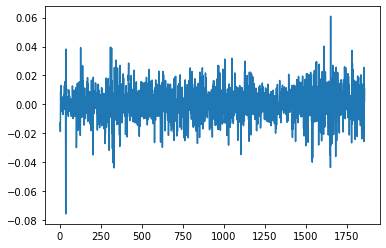

In [9]:
# Method a) differencing the time series - This can be done using shift()

diff1_ts = log_ts - log_ts.shift()

# Lets plot the diff1_ts

plt.plot(diff1_ts)

As from the above plot it look like that its a stationary time series but we can not be 100% sure thus we use dikey-fuller test

In [11]:
# Lets apply this test on diff1_ts

# as differencing the time series would have brought null value, lets drop them from the series

diff1_ts.dropna(inplace = True)

result1 = adfuller(diff1_ts)
result1

(-41.82603216628819,
 0.0,
 0,
 1858,
 {'1%': -3.433874411978076,
  '5%': -2.8630968301361275,
  '10%': -2.567598800775398},
 -11303.259591405535)

In [12]:
print(f'Test Statistics: {result1[0]}')
print(f'p-value: {result1[1]}')
print(f'Critial Values: {result1[4]}') ## {} to get list of the critical values

if result1[1] > 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')

Test Statistics: -41.82603216628819
p-value: 0.0
Critial Values: {'1%': -3.433874411978076, '5%': -2.8630968301361275, '10%': -2.567598800775398}
Series is Stationary


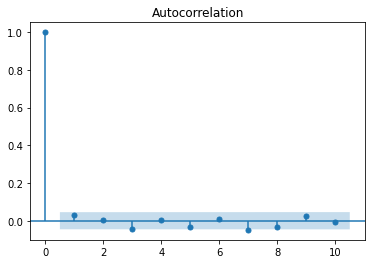

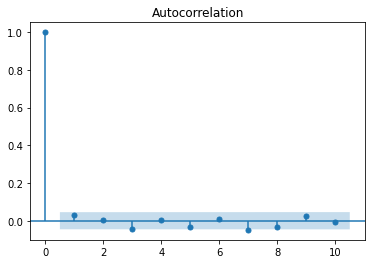

In [16]:
# Lets plot the ACF chart

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(diff1_ts, lags = 10)

As we can See that at lag 1 we can see that correlation coefficient value is nearly 0 or slightly positive so we can use AR Model but we can not surely conclude that so we plot both the Model

1st Model - AR model with p = 1, d, q = 0

2nd Model - MA model with p = 0, d, q = 1

In [17]:
# Lets build the 1st ARIMA model - AR Model with p = 1, d = 1, q = 0

from statsmodels.tsa.arima_model import ARIMA


# Lets build the model

model_AR = ARIMA(log_ts, order = (1,1,0))

# Lets fit this model to get the summary of the model

summary_model_AR = model_AR.fit(disp = False)

summary_model_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.CAC   No. Observations:                 1859
Model:                 ARIMA(1, 1, 0)   Log Likelihood                5742.133
Method:                       css-mle   S.D. of innovations              0.011
Date:                Sat, 26 Feb 2022   AIC                         -11478.265
Time:                        17:21:18   BIC                         -11461.682
Sample:                             1   HQIC                        -11472.154
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0004      0.000      1.659      0.097   -7.94e-05       0.001
ar.L1.D.CAC     0.0297      0.023      1.281      0.200      -0.016       0.075
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           33.6638           +0.0000j           33.6638            0.0000
-----------------------------------------------------------------------------
"""

In [18]:
# Lets build the 2nd Model - MA model with p = 0, d = 1, q = 1

model_MA = ARIMA(log_ts, order = (0,1,1))

# Lets fit this model to get the summary of the model

summary_model_MA = model_MA.fit(disp = False)

summary_model_MA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.CAC   No. Observations:                 1859
Model:                 ARIMA(0, 1, 1)   Log Likelihood                5742.126
Method:                       css-mle   S.D. of innovations              0.011
Date:                Sat, 26 Feb 2022   AIC                         -11478.251
Time:                        17:22:58   BIC                         -11461.668
Sample:                             1   HQIC                        -11472.140
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0004      0.000      1.661      0.097   -7.88e-05       0.001
ma.L1.D.CAC     0.0294      0.023      1.278      0.201      -0.016       0.075
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1          -34.0042           +0.0000j           34.0042            0.5000
-----------------------------------------------------------------------------
"""

The AIC value for AR model is -11478.265 and the AIC value for MA model is -11478.251. Thus, AR model have the least AIC value and will be the best model to forecast the time series data.

so we have to predict next 520days so my Data point will be(1880+520)=2380

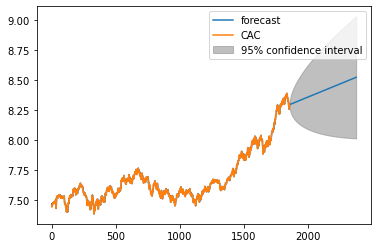

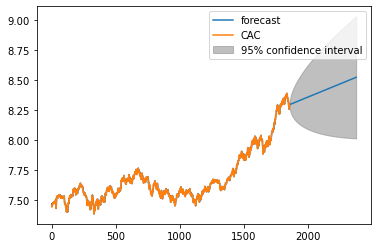

In [20]:
# Predict the values

summary_model_AR.plot_predict(2,2380)

Output:
    
Average Stock Pricr for Next 520 days will be arround np.exp(8.4)~ 4450 with 95% confidence level.I can say that rane will be 
between np.exp(8) ~ 2980 and np.exp(9) ~ 8103

In [26]:
np.exp(8)

2980.9579870417283